### Linear Regression Practical Implementation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
# Independent features
X = df.drop("median_house_value", axis=1)

# Dependent feature (target)
y = df["median_house_value"]


In [10]:
X = pd.get_dummies(X, drop_first=True)


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [12]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size = 0.30, random_state =42) 

In [13]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,False,False,False,False
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,False,False,False,True
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,False,False,False,True
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,True,False,False,False
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,False,False,False,False
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,True,False,False,False
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,False,False,False,False
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,False,False,False,False


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [15]:
## standardizing the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_final = scaler.fit_transform(X_train_imputed)
X_test_final = scaler.transform(X_test_imputed)



In [28]:
regression = LinearRegression()
regression.fit(X_train_final, y_train)

reg_pred = regression.predict(X_test_final)

In [29]:
reg_pred

array([ 54771.57929089, 123151.42089787, 252799.45818433, ...,
       283840.43397151, 113960.4061616 , 219047.40125172])

In [30]:
X_train_final.shape


(14448, 12)

In [31]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,False,False,False,False
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,False,False,False,True
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,False,False,False,True
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,True,False,False,False
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,False,False,False,False
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,True,False,False,False
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,False,False,False,False
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,False,False,False,False


In [32]:
from sklearn.linear_model import LinearRegression

## cross validation
from sklearn.model_selection import cross_val_score

In [33]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
mse = cross_val_score(regression,X_train, y_train,scoring = 'neg_mean_squared_error' , cv=5)

In [35]:
np.mean(mse)

-4763194358.520655

In [36]:
### prediction
X.isnull().sum()


longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [37]:
reg_pred


array([ 54771.57929089, 123151.42089787, 252799.45818433, ...,
       283840.43397151, 113960.4061616 , 219047.40125172])

C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


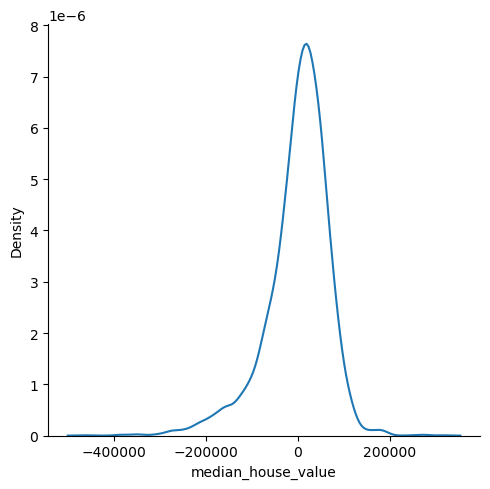

In [38]:
import seaborn as sns
sns.displot(reg_pred - y_test ,kind = 'kde')



In [39]:
 from sklearn.metrics import r2_score


In [40]:
score = r2_score(reg_pred,y_test)

In [41]:
score

0.44902305178058777

### Ridge Regression Algorithm

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
ridge_regressor = Ridge()


In [44]:
ridge_regressor

Ridge()

In [45]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters ,scoring = 'neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [46]:
print(ridgecv.best_params_)

{'alpha': 1}


In [47]:
print(ridgecv.best_score_)

-4763670176.99049


In [51]:
ridge_pred = ridgecv.predict(X_test_final)  


C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


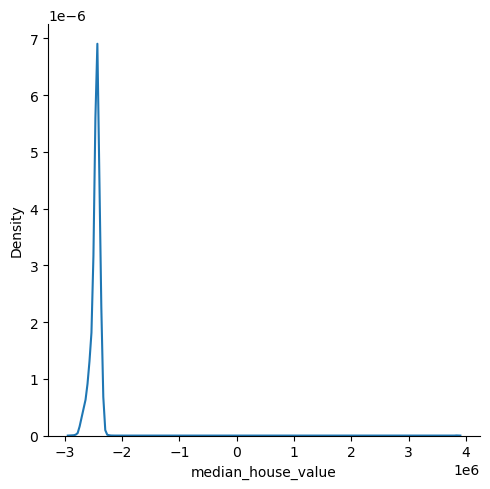

In [53]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind = 'kde')

In [54]:
score = r2_score(ridge_pred ,y_test)

In [55]:
score

-517.1725061457378

### Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

In [57]:
lasso =Lasso()

In [58]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso,parameters ,scoring = 'neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [59]:
print(lassocv.best_params_)

{'alpha': 1}


In [60]:
print(lassocv.best_score_)

-4763214581.804933


In [62]:
lasso_pred = lassocv.predict(X_test_final)


C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


C:\Users\ankit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


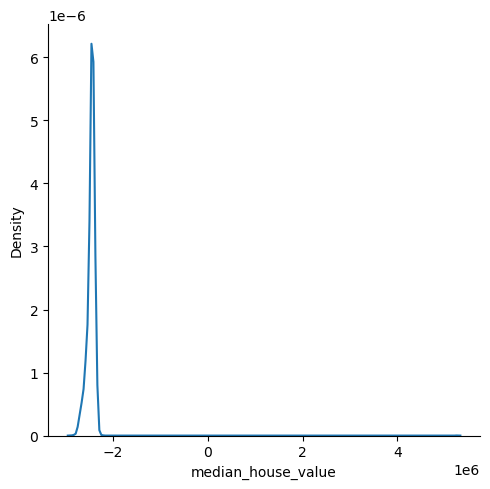

In [63]:
import seaborn as sns
sns.displot(lasso_pred-y_test, kind='kde')